In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd

In [4]:
# generate regression datase
X, y = make_regression(n_samples=500, n_features=1, noise= 12, random_state =2)

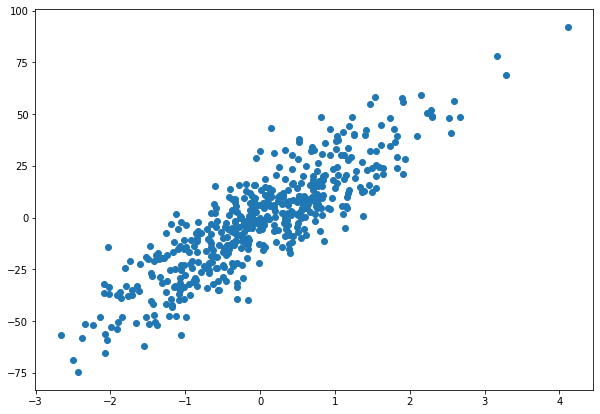

In [5]:
# plot regression dataset
fig = plt.figure(figsize= (10, 7) )
plt.scatter(X,y)

plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)

In [7]:
X_test.size

200

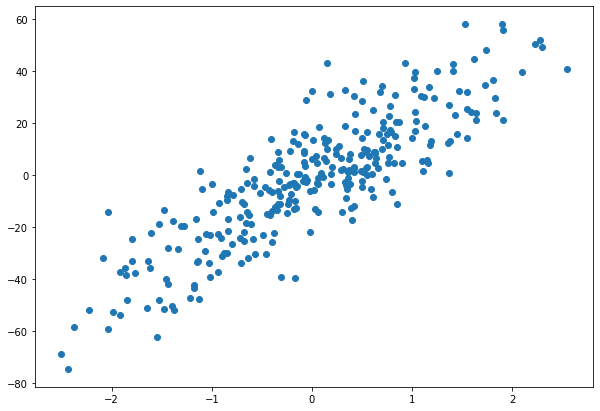

In [8]:
fig = plt.figure(figsize= (10, 7) )
plt.scatter(X_train,y_train)

plt.show()

In [11]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(regr.coef_ , regr.intercept_)

[21.2066543] -1.468385664418054


In [13]:
y_pred = regr.predict(X_test)

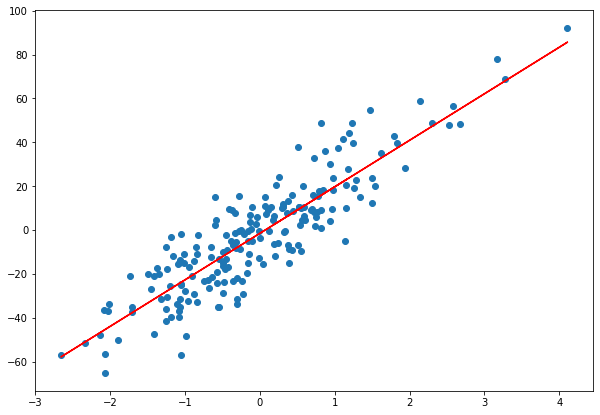

In [14]:
fig = plt.figure(figsize= (10, 7) )
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred, color ='r')
plt.show()

In [15]:
mean_squared_error(y_test, y_pred) # plus petit , mieux c'est

147.33044736973886

In [16]:
r2_score(y_test, y_pred)  # meilleur = 1 

0.7886039698648802

In [17]:
print(X.shape)
print(y.shape)
X = X.reshape(-1,)
y = y.reshape(-1,)

print(X.shape)

(500, 1)
(500,)
(500,)


In [18]:
d = {'X': X , 'y': y}
regression_data = pd.DataFrame(data = d)

In [19]:
print(regression_data.head())
print(regression_data.info())


          X          y
0 -0.454228 -30.542363
1 -0.933831 -37.320518
2 -0.495779  -9.835616
3 -0.373339 -12.415292
4  0.046256  -2.921022
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
None


In [22]:
regression_data.to_parquet('myregression.pq')

In [23]:
regression_data.to_csv('myregression.csv')